# Phase 1 - Exploration des données ATP

Objectif : Comprendre la structure des données et préparer les features pour le modèle de prédiction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Configuration
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_rows', None)

In [3]:
X=pd.read_parquet('../data/processed/X_train.parquet')
X.tail()

,rank_a,rank_b,points_a,points_b,age_a,age_b,height_a,height_b,is_left_a,is_left_b,best_of_5,rank_diff,rank_ratio,points_diff,age_diff,height_diff,win_rate_a,ace_rate_a,df_rate_a,first_serve_pct_a,first_serve_won_a,second_serve_won_a,bp_save_rate_a,matches_played_a,win_rate_b,ace_rate_b,df_rate_b,first_serve_pct_b,first_serve_won_b,second_serve_won_b,bp_save_rate_b,matches_played_b,surface_win_rate_a,surface_win_rate_b,h2h_win_rate_a,win_rate_diff,surface_win_rate_diff,ace_rate_diff,bp_save_rate_diff,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
9027,68.0,8.0,834.0,3395.0,29.7,27.0,183.0,196.0,0,0,0,60.0,8.500000,-2561.0,2.7,-13.0,0.5,0.118077,0.021944,0.592476,0.761905,0.456410,0.697368,10,0.70,0.176808,0.021814,0.631458,0.836364,0.566978,0.612903,10,0.45,0.65,0.00,-0.20,-0.20,-0.058731,0.084465,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
9028,4.0,48.0,8015.0,975.0,28.0,28.7,198.0,191.0,0,0,0,-44.0,0.083333,7040.0,-0.7,7.0,0.7,0.092321,0.044866,0.629853,0.763014,0.463869,0.659091,10,0.30,0.096400,0.016260,0.681765,0.717206,0.503650,0.616667,10,0.65,0.45,1.00,0.40,0.20,-0.004079,0.042424,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
9029,55.0,700.0,922.0,40.0,33.6,18.8,183.0,188.0,0,1,0,-645.0,0.078571,882.0,14.8,-5.0,0.5,0.033206,0.010217,0.707535,0.685921,0.502183,0.517241,10,0.25,0.035144,0.035144,0.638978,0.610000,0.584071,0.458333,4,0.45,0.00,0.50,0.25,0.45,-0.001938,0.058908,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False
9030,18.0,8.0,1990.0,3395.0,25.6,27.0,188.0,196.0,1,0,0,10.0,2.250000,-1405.0,-1.4,-8.0,0.7,0.091495,0.014175,0.653351,0.749507,0.568773,0.660377,10,0.70,0.176808,0.021814,0.631458,0.836364,0.566978,0.612903,10,0.80,0.65,0.25,0.00,0.15,-0.085313,0.047474,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
9031,4.0,18.0,8015.0,1990.0,28.0,25.6,198.0,188.0,0,1,0,-14.0,0.222222,6025.0,2.4,10.0,0.7,0.092321,0.044866,0.629853,0.763014,0.463869,0.659091,10,0.70,0.091495,0.014175,0.653351,0.749507,0.568773,0.660377,10,0.65,0.80,0.50,0.00,-0.15,0.000826,-0.001286,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True


## 1. Chargement des données

In [3]:
# Chemin vers les données
DATA_PATH = Path('../data/raw')

# Charger les matchs des 10 dernières années (2015-2024)
years = range(2021, 2025)
dfs = []

for year in years:
    file_path = DATA_PATH / f'atp_matches_{year}.csv'
    if file_path.exists():
        df = pd.read_csv(file_path)
        dfs.append(df)
        print(f'{year}: {len(df)} matchs')

matches = pd.concat(dfs, ignore_index=True)
print(f'\nTotal: {len(matches)} matchs')

2021: 2733 matchs
2022: 2917 matchs
2023: 2986 matchs
2024: 3076 matchs

Total: 11712 matchs


## 2. Structure des données

In [4]:
# Aperçu des colonnes
print('Colonnes disponibles:')
print(matches.columns.tolist())

Colonnes disponibles:
['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']


In [5]:
# Premières lignes
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0096,Tokyo Olympics,Hard,64,A,20210724,237,126207,NaN,NaN,Frances Tiafoe,R,188.0,USA,23.4,126952,NaN,NaN,Soon Woo Kwon,R,180.0,KOR,23.6,6-3 6-2,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1228.0,71.0,996.0
1,2021-0096,Tokyo Olympics,Hard,64,A,20210724,238,105526,NaN,NaN,Jan Lennard Struff,R,193.0,GER,31.2,106329,NaN,NaN,Thiago Monteiro,L,183.0,BRA,27.1,6-3 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1410.0,95.0,829.0
2,2021-0096,Tokyo Olympics,Hard,64,A,20210724,239,111576,NaN,NaN,Sumit Nagal,R,178.0,IND,23.9,104797,NaN,NaN,Denis Istomin,R,185.0,UZB,34.8,6-4 6-7(6) 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,471.0,197.0,354.0
3,2021-0096,Tokyo Olympics,Hard,64,A,20210724,240,105357,NaN,NaN,John Millman,R,183.0,AUS,32.0,207518,NaN,NaN,Lorenzo Musetti,R,185.0,ITA,19.3,6-3 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1476.0,61.0,1106.0
4,2021-0096,Tokyo Olympics,Hard,64,A,20210724,241,207830,NaN,NaN,Tomas Machac,R,183.0,CZE,20.7,105311,NaN,NaN,Joao Sousa,R,185.0,POR,32.3,6-7(5) 6-4 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,525.0,137.0,570.0


In [20]:
matches_ret = matches[matches['score'].str.contains('RET', na=False)]
matches_ret.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
65,2021-0308,Munich,Clay,32,A,20210426,272,105550,NaN,NaN,Guido Pella,L,183.0,ARG,30.9,106078,NaN,NaN,Egor Gerasimov,R,196.0,BLR,28.4,6-0 2-0 RET,3,R32,50.0,1.0,1.0,31.0,23.0,18.0,2.0,4.0,2.0,2.0,3.0,4.0,44.0,27.0,11.0,6.0,4.0,7.0,11.0,55.0,1163.0,76.0,950.0
77,2021-0308,Munich,Clay,32,A,20210426,287,105357,8.0,NaN,John Millman,R,183.0,AUS,31.8,105550,NaN,NaN,Guido Pella,L,183.0,ARG,30.9,4-6 2-0 RET,3,R16,74.0,3.0,0.0,43.0,31.0,21.0,4.0,6.0,5.0,7.0,3.0,1.0,49.0,29.0,19.0,9.0,6.0,1.0,3.0,40.0,1461.0,55.0,1163.0
131,2021-0314,Gstaad,Clay,32,A,20210719,282,103852,8.0,NaN,Feliciano Lopez,L,188.0,ESP,39.8,144817,NaN,NaN,Marc Andrea Huesler,L,196.0,SUI,25.0,6-4 4-6 6-5 RET,3,R32,126.0,8.0,6.0,91.0,45.0,34.0,27.0,16.0,4.0,7.0,13.0,6.0,91.0,44.0,34.0,26.0,15.0,4.0,7.0,89.0,843.0,162.0,467.0
138,2021-0314,Gstaad,Clay,32,A,20210719,290,105332,6.0,NaN,Benoit Paire,R,196.0,FRA,32.1,134868,NaN,NaN,Tallon Griekspoor,R,188.0,NED,25.0,6-4 0-0 RET,3,R16,35.0,9.0,1.0,28.0,20.0,19.0,3.0,5.0,1.0,1.0,1.0,0.0,23.0,18.0,14.0,4.0,5.0,0.0,1.0,49.0,1364.0,105.0,772.0
151,2021-0315,Newport,Grass,32,A,20210712,273,111442,7.0,NaN,Jordan Thompson,R,183.0,AUS,27.2,105649,NaN,NaN,Cedrik Marcel Stebe,L,183.0,GER,30.7,5-4 RET,3,R32,56.0,1.0,1.0,28.0,10.0,9.0,9.0,4.0,1.0,2.0,2.0,5.0,32.0,18.0,15.0,2.0,5.0,4.0,6.0,71.0,982.0,139.0,566.0


In [7]:
# Types de données
matches.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

In [8]:
# Statistiques descriptives
matches.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,11712.000000,1.171200e+04,11712.000000,11712.000000,4929.000000,11665.000000,11710.000000,11712.000000,2924.000000,11590.000000,11709.000000,11712.000000,10879.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11662.000000,11662.000000,11597.000000,11597.000000
mean,61.997780,2.022605e+07,243.032275,141969.272199,7.827348,187.690013,26.648668,140531.218665,9.360807,186.630889,27.059997,3.354679,115.908264,7.024081,2.528273,78.833482,49.938191,37.779076,15.997949,12.673832,3.436943,4.967446,5.311720,3.169015,81.780414,50.545041,33.913486,14.494738,12.438548,4.759276,8.449875,73.804407,1911.145858,108.753643,1214.270415
std,44.037629,1.112818e+04,85.829903,41978.039326,7.196851,7.050068,4.470614,41874.141037,7.811768,7.281247,4.538442,0.763944,42.880159,5.416730,2.272531,28.872340,18.988089,13.496521,6.646367,4.181761,3.072815,4.003089,4.908761,2.525346,28.688195,19.003603,14.215608,6.866924,4.173824,3.280855,4.153152,117.800694,2076.451966,167.369342,1295.525822
min,2.000000,2.021010e+07,1.000000,100644.000000,1.000000,15.000000,17.000000,100644.000000,1.000000,15.000000,15.000000,3.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,2.022012e+07,216.000000,106078.000000,3.000000,183.000000,23.500000,106043.000000,4.000000,183.000000,23.800000,3.000000,85.000000,3.000000,1.000000,57.000000,36.000000,28.000000,11.000000,10.000000,1.000000,2.000000,2.000000,1.000000,60.000000,37.000000,24.000000,10.000000,9.000000,2.000000,5.000000,18.000000,717.250000,35.000000,570.000000
50%,32.000000,2.023012e+07,277.000000,126203.000000,6.000000,188.000000,26.000000,124116.000000,7.000000,185.000000,26.600000,3.000000,109.000000,6.000000,2.000000,74.000000,47.000000,36.000000,15.000000,11.000000,3.000000,4.000000,4.000000,3.000000,76.000000,47.000000,32.000000,14.000000,11.000000,4.000000,8.000000,46.000000,1090.000000,66.000000,855.000000
75%,128.000000,2.024012e+07,291.000000,200270.000000,10.000000,193.000000,29.200000,200221.000000,13.000000,191.000000,29.900000,3.000000,141.000000,10.000000,4.000000,95.000000,60.000000,45.000000,20.000000,15.000000,5.000000,7.000000,7.000000,4.000000,98.000000,61.000000,42.000000,18.000000,15.000000,7.000000,11.000000,86.000000,2270.000000,111.000000,1340.000000
max,128.000000,2.024122e+07,401.000000,212721.000000,33.000000,211.000000,44.600000,212970.000000,33.000000,211.000000,43.900000,5.000000,345.000000,54.000000,23.000000,228.000000,153.000000,116.000000,49.000000,31.000000,23.000000,28.000000,48.000000,26.000000,220.000000,165.000000,104.000000,52.000000,31.000000,27.000000,38.000000,1783.000000,12113.000000,2146.000000,12113.000000


## 3. Valeurs manquantes

In [9]:
# Pourcentage de valeurs manquantes par colonne
missing = (matches.isnull().sum() / len(matches) * 100).sort_values(ascending=False)
missing[missing > 0]

winner_entry          84.673839
loser_entry           76.929645
loser_seed            75.034153
winner_seed           57.914959
minutes                7.112363
l_df                   4.269126
l_svpt                 4.269126
w_bpFaced              4.269126
l_ace                  4.269126
w_1stWon               4.269126
w_ace                  4.269126
w_df                   4.269126
w_svpt                 4.269126
w_2ndWon               4.269126
w_1stIn                4.269126
l_1stIn                4.269126
l_1stWon               4.269126
l_2ndWon               4.269126
l_SvGms                4.269126
l_bpSaved              4.269126
l_bpFaced              4.269126
w_bpSaved              4.269126
w_SvGms                4.269126
loser_ht               1.041667
loser_rank_points      0.981899
loser_rank             0.981899
surface                0.452527
winner_rank            0.426913
winner_rank_points     0.426913
winner_ht              0.401298
loser_age              0.025615
winner_a

## 4. Analyse des surfaces

surface
Hard     6840
Clay     3530
Grass    1289
Name: count, dtype: int64


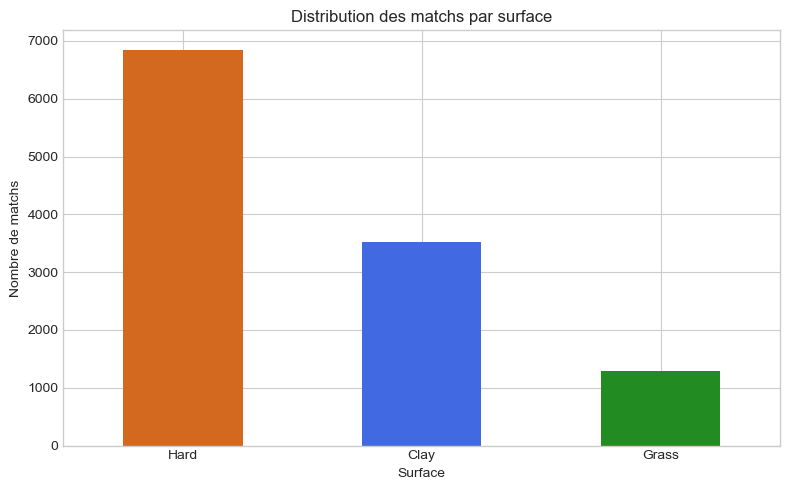

In [10]:
# Distribution des surfaces
surface_counts = matches['surface'].value_counts()
print(surface_counts)

# Visualisation
fig, ax = plt.subplots(figsize=(8, 5))
surface_counts.plot(kind='bar', ax=ax, color=['#D2691E', '#4169E1', '#228B22', '#808080'])
ax.set_title('Distribution des matchs par surface')
ax.set_xlabel('Surface')
ax.set_ylabel('Nombre de matchs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Analyse des classements

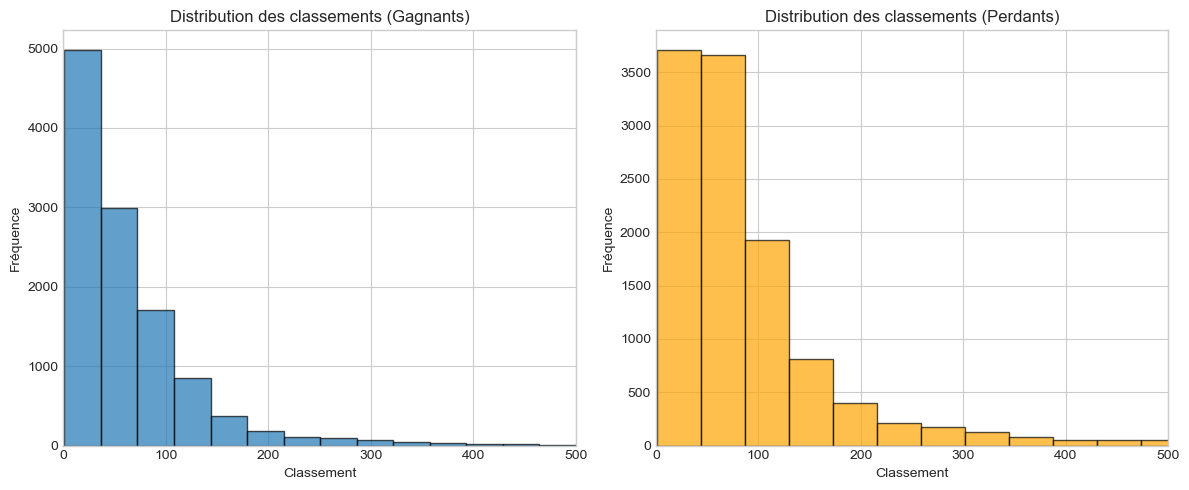

In [11]:
# Distribution des classements des gagnants vs perdants
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Classement des gagnants
axes[0].hist(matches['winner_rank'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution des classements (Gagnants)')
axes[0].set_xlabel('Classement')
axes[0].set_ylabel('Fréquence')
axes[0].set_xlim(0, 500)

# Classement des perdants
axes[1].hist(matches['loser_rank'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Distribution des classements (Perdants)')
axes[1].set_xlabel('Classement')
axes[1].set_ylabel('Fréquence')
axes[1].set_xlim(0, 500)

plt.tight_layout()
plt.show()

In [12]:
# Le mieux classé gagne-t-il toujours ?
matches_with_ranks = matches.dropna(subset=['winner_rank', 'loser_rank'])
better_ranked_wins = (matches_with_ranks['winner_rank'] < matches_with_ranks['loser_rank']).mean()

print(f'Le mieux classé gagne: {better_ranked_wins:.1%} des matchs')
print(f'\nCeci est notre BASELINE à battre!')

Le mieux classé gagne: 63.9% des matchs

Ceci est notre BASELINE à battre!


## 6. Statistiques de match disponibles

In [13]:
# Colonnes de statistiques (pour les features avancées)
stat_columns = [col for col in matches.columns if any(x in col for x in ['ace', 'df', 'svpt', 'bp', '1st', '2nd'])]
print('Statistiques disponibles:')
for col in stat_columns:
    print(f'  - {col}')

Statistiques disponibles:
  - surface
  - w_ace
  - w_df
  - w_svpt
  - w_1stIn
  - w_1stWon
  - w_2ndWon
  - w_bpSaved
  - w_bpFaced
  - l_ace
  - l_df
  - l_svpt
  - l_1stIn
  - l_1stWon
  - l_2ndWon
  - l_bpSaved
  - l_bpFaced


In [14]:
# Pourcentage de matchs avec statistiques complètes
has_stats = matches[stat_columns].notna().all(axis=1).mean()
print(f'Matchs avec stats complètes: {has_stats:.1%}')

Matchs avec stats complètes: 95.7%


## 7. Tournois et niveaux

In [15]:
# Types de tournois
print('Niveaux de tournois:')
print(matches['tourney_level'].value_counts())

Niveaux de tournois:
tourney_level
A    6302
M    2422
G    2032
D     817
F      75
O      64
Name: count, dtype: int64


In [16]:
# Nombre de tournois uniques
print(f"\nNombre de tournois: {matches['tourney_name'].nunique()}")
print(f"Nombre de joueurs: {pd.concat([matches['winner_name'], matches['loser_name']]).nunique()}")


Nombre de tournois: 382
Nombre de joueurs: 727


## 8. Prochaines étapes

Maintenant qu'on comprend les données, on peut :

1. **Nettoyer les données** : gérer les valeurs manquantes, filtrer les walkovers
2. **Créer les features** : 
   - `rank_diff` : différence de classement
   - `win_rate_surface` : % victoires par surface (derniers 30 matchs)
   - `recent_form` : % victoires (derniers 10 matchs)
   - `h2h` : historique face-à-face
3. **Entraîner le modèle** : régression logistique puis Random Forest